# 데이터 분석을 위한 전처리와 시각화 with 파이썬

# 7장. 시각화 라이브러리 (2)

## 학습 목표

* 데이터 시각화 필요성을 이해하고 사용한다.
* 데이터 시각화에 효율적인 맷플롯립(Matplotlib) 라이브러리를 이해하고 사용한다.
* **맷플롯립(Matplotlib) 라이브러리로 표현한 그래프에 시본(Seaborn) 라이브러리를 활용하여 손쉽게 입체적이고 실용적인 그래프로 표현한다.**

## 3. 시본(Seaborn) 라이브러리

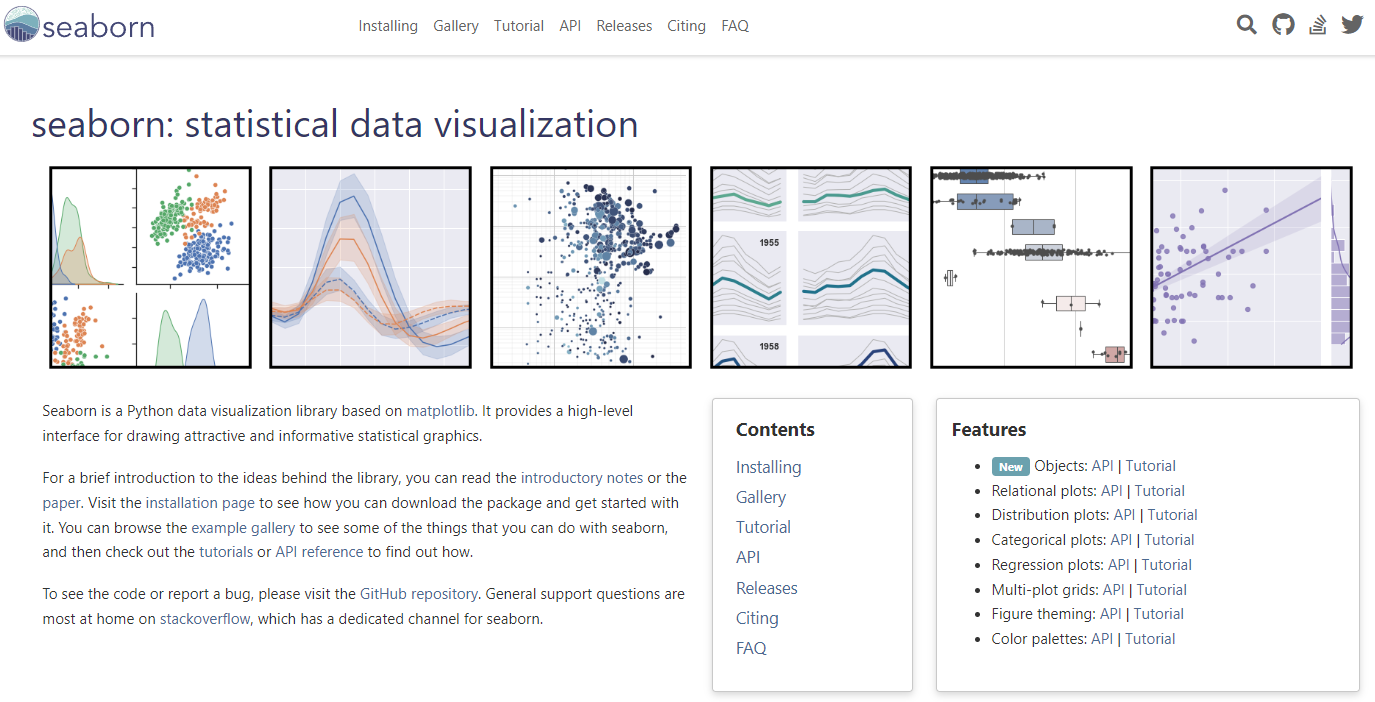

* Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구 고급 버전
  - 다양한 테마와 통계용 차트 등의 동적인 기능 추가
* 아나콘다 배포판에는 기본 설치되어 있음

> [Seaborn 공식 홈페이지](https://seaborn.pydata.org/)에서 라이브러리 설치, 문서 및 예제 참고 가능

### [시본 라이브러리의 주요 특징]
* 뛰어난 시각화 효과
* 간결한 구문 제공
* 판다스 데이터프레임에 최적화
* 쉬운 데이터프레임 집계 및 차트 요약

### [시본 라이브러리 시각화 단계]
1. 데이터 준비
2. 배경 설정
3. 시각화
4. 개별 그래프 상세 설정

* 시본의 set() 함수를 미리 선언하여 시본 팔레트로 출력하면 맷플롯립 보다 더 많은 색상을 표현
  - 6개의 기본 팔레드 제공 : deep, muted, pastel, bright, dark, colorblind

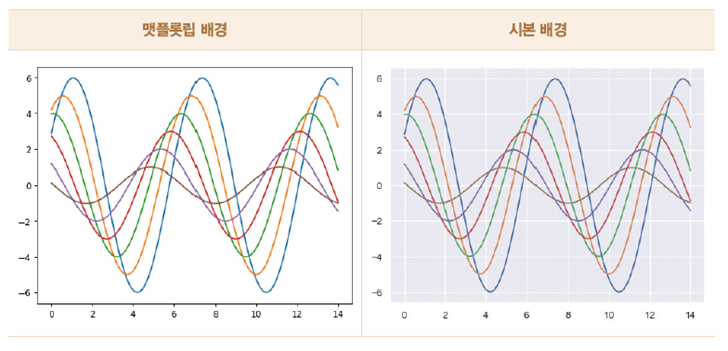

### 3.1 데이터 시각화 준비하기

### [라이브러리 및 데이터 읽어오기]

#### 실습 코드 7-23. 라이브러리 임포트 및 '2020년 건강검진' 엑셀 파일 읽어오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시본 라이브러리 준비

In [4]:
data = pd.read_excel('health_screenings_2020_1000ea.xlsx')

In [5]:
data.head()

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29


### [데이터 전처리]

#### 실습 코드 7-24. '2020년 건강검진' 정보에서 성별, 음주 여부, 흡연 상태 데이터 전처리

In [6]:
# 불러온 건강검진 정보에서 6개의 정보(성별, 키, 몸무게, 허리둘레, 음주 여부, 흡연 상태)를 선별하여 data6에 저장
data6 = data.loc[:,['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

# 가독성을 위해 열 이름을 변경
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2),['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

data6.head()

C:\Users\PC1\AppData\Local\Temp\ipykernel_10748\1048874158.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['gender']==1,['gender']]='Male'
C:\Users\PC1\AppData\Local\Temp\ipykernel_10748\1048874158.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
C:\Users\PC1\AppData\Local\Temp\ipykernel_10748\1048874158.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,Non-drinking,Non-smoking
1,Female,150,65,81.0,Non-drinking,Non-smoking
2,Female,155,55,70.0,Non-drinking,Non-smoking
3,Male,160,70,90.8,Non-drinking,Non-smoking
4,Female,155,50,75.2,Non-drinking,Non-smoking


### 3.2 시본 막대 그래프

### [데이터 준비하기]

#### 실습 코드 7-25. 음주 여부 및 흡연 상태 데이터 준비하기

In [7]:
# 성별, 음주 여부의 그룹별 개수(인원)을 구하여 drinking 변수에 저장
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
# 성별, 흡연 상태의 그룹별 개수(인원)을 구하여 drinking 변수에 저장
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()

print(drinking)
print(smoking)

gender  drinking    
Female  Drinking        213
        Non-drinking    305
Male    Drinking        356
        Non-drinking    126
Name: drinking, dtype: int64
gender  smoking    
Female  Non-smoking    500
        Smoking         18
Male    Non-smoking    321
        Smoking        161
Name: smoking, dtype: int64


In [8]:
# 시리즈 변수(drinking, smoking)을 데이터프레임 타입으로 변경
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')

print(drinking)
print(smoking)

                     count
gender drinking           
Female Drinking        213
       Non-drinking    305
Male   Drinking        356
       Non-drinking    126
                    count
gender smoking           
Female Non-smoking    500
       Smoking         18
Male   Non-smoking    321
       Smoking        161


In [9]:
drinking

count
gender drinking           
Female Drinking        213
       Non-drinking    305
Male   Drinking        356
       Non-drinking    126

In [10]:
smoking

count
gender smoking           
Female Non-smoking    500
       Smoking         18
Male   Non-smoking    321
       Smoking        161

In [11]:
# 그룹화된 행 인덱스를 초기화 (인덱스로 설정되었던 gender, drinking은 열 데이터로 편입)
drinking = drinking.reset_index()
smoking = smoking.reset_index()

print(drinking)
print(smoking)

   gender      drinking  count
0  Female      Drinking    213
1  Female  Non-drinking    305
2    Male      Drinking    356
3    Male  Non-drinking    126
   gender      smoking  count
0  Female  Non-smoking    500
1  Female      Smoking     18
2    Male  Non-smoking    321
3    Male      Smoking    161


In [12]:
drinking

,gender,drinking,count
0,Female,Drinking,213
1,Female,Non-drinking,305
2,Male,Drinking,356
3,Male,Non-drinking,126


In [13]:
smoking

,gender,smoking,count
0,Female,Non-smoking,500
1,Female,Smoking,18
2,Male,Non-smoking,321
3,Male,Smoking,161


### [기본 막대 그래프 그리기]

* **figure.add_subplot(row_num, col_num, index)** : 한 화면에 여러개 그래프(서브플롯 : subplot) 영역 생성
  - row_num : 행의 개수
  - col_num : 열의 개수
  - index : 서브플롯이 들어갈 위치
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_subplot.html

---

* **figure.suptitle(text, ha, va, fontsize, fontweight)** : 서브플롯 전체 제목 설정
  - text : 출력할 제목 글자
  - ha (horizontalalignment) : 제목의 가로 정렬
    + 설정값 : 'center'(기본), 'left', 'right'
  - va (verticalalignment) : 제목의 세로 정렬
    + 설정값 : 'top'(기본), 'center', 'botton', 'baseline'
  - fontsize (size) : 글자 크기
    + 설정값 : 'xx-small', 'x-small', 'small', 'medium', 'large'(기본), 'x-large', 'xx-large'
  - fontweight (weight) : 글자 진하기
    + 설정값 : 0~1000 숫자, 'light', 'normal', 'regular', 'medium', 'bold', 'heavy', ...
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

#### 실습 코드 7-26. 성별 음주 여부 및 흡연 상태 막대 그래프

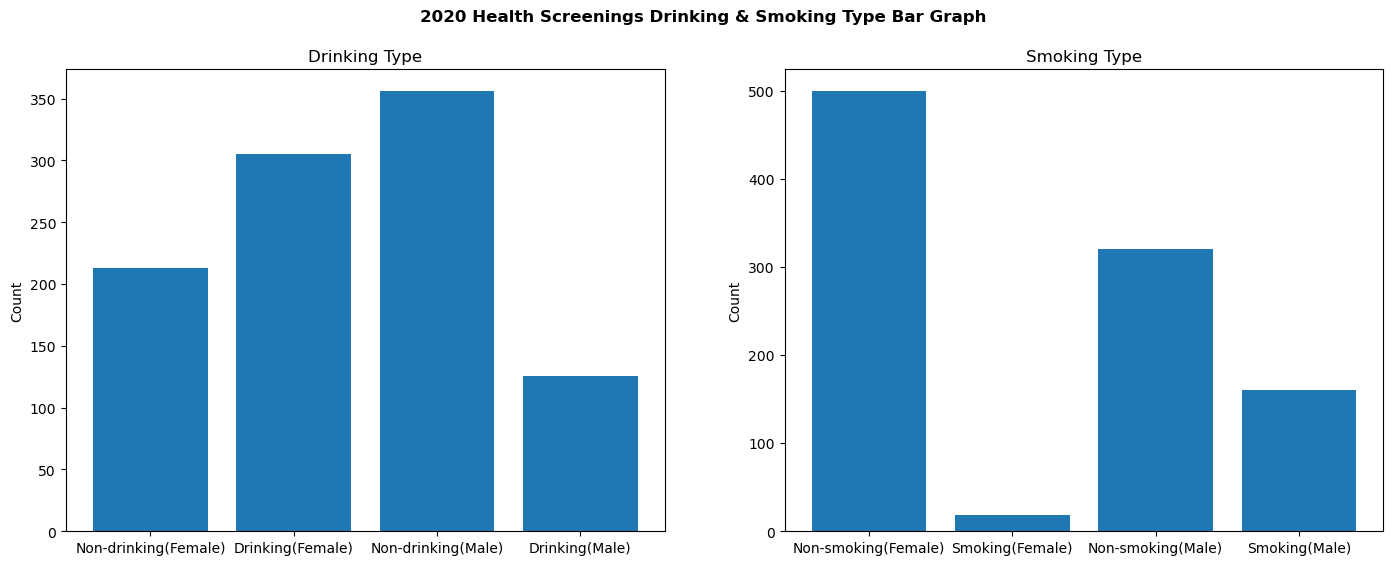

In [14]:
# 가로 17인치, 세로 6인치의 영역을 가지는 그림 객체(figure)를 생성
fig = plt.figure(figsize=(17,6))

# 그래프 영역 전체 제목 설정
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph',fontweight='bold')

index = np.arange(4)

# 그래프 영역을 1행 2열로 생성하고 첫번째 서브플롯 모양 설정
fig.add_subplot(1,2,1)

plt.bar(index, drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
plt.xticks(index, ['Non-drinking(Female)','Drinking(Female)','Non-drinking(Male)','Drinking(Male)'])

# 두번째 서브플롯 모양 설정
fig.add_subplot(1,2,2)

plt.bar(index, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index, ['Non-smoking(Female)', 'Smoking(Female)', 'Non-smoking(Male)', 'Smoking(Male)'])

# 1행 2열 그래프 화면 표시
plt.show()

### [시본 막대 그래프 그리기]
* **sns.barplot(x, y, data, hue, dodge, ci, ax)**
   - **x** : x 축 할당 변수
   - **y** : y 축 할당 변수
   - **data** : 표시할 데이터프레임 데이터셋
   - **hue** : 세부 열을 지정해서 막대그래프를 해당 열로 세분화하여 출력
   - **dodge** : 누적 출력 여부
   - **ci** : 오차막대(error bar) 표시 여부
      + 기본적으로 '부트스트랩 신뢰구간(Bootstrap Confidence Interval)'을 적용
      + 이 데이터를 기반으로 유사한 상황의 95% 범위 내에서 결과를 얻음
      + *None* : 오차 막대 제거, *sd* : 표준편차 값으로 오차 막대 표시
   - **ax** : 서브플롯 객체
   - https://seaborn.pydata.org/generated/seaborn.barplot.html

#### 실습 코드 7-27. 성별 음주 여부 및 흡연상태 시본 막대 그래프

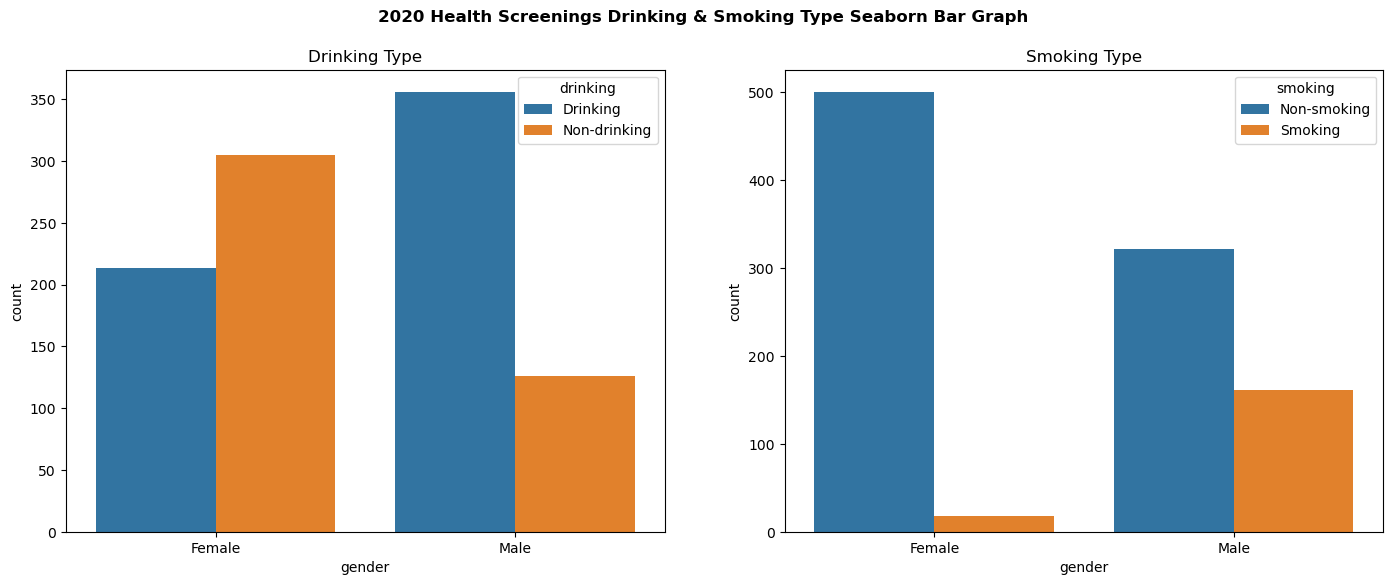

In [17]:
# 가로 17인치, 세로 6인치의 영역을 가지는 그림 객체(figure)를 생성
fig = plt.figure(figsize=(17,6))

# 그래프 영역을 1행 2열로 생성하고 첫번째 서브플롯은 area1에 두번째 서브플롯은 area2에 할당
area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

# 시본의 barplot() 함수로 막대 그래프 표시
ax1 = sns.barplot(data=drinking,x='gender',y='count',hue='drinking',ax=area1)
ax2 = sns.barplot(data=smoking,x='gender',y='count',hue='smoking',ax=area2)

fig.suptitle('2020 Health Screenings Drinking & Smoking Type Seaborn Bar Graph',fontweight='bold')

# 각 서브플롯의 제목 설정
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

plt.show()

### 3.3 시본 산점도 그래프

* 스트립 플롯(Strip Plot), 스웜 플롯(Swarm Plot) 그래프 등
* 맷플롯립의 산점도 그래프보다 범주에 따른 각 분포의 실제 데이터나 전체 형상 등을 보여줌

### [데이터 준비하기]

#### 실습 코드 7-28. 남성 및 여성의 성별, 몸무게, 허리둘레, 음주 여부, 흡연상태 데이터 가져오기

In [18]:
male_data = data6.loc[data6.gender=='Male',['gender','weight','waist','drinking','smoking']]
female_data = data6.loc[data6.gender=='Female',['gender','weight','waist','drinking','smoking']]

In [19]:
male_data.head()

,gender,weight,waist,drinking,smoking
0,Male,60,72.1,Non-drinking,Non-smoking
3,Male,70,90.8,Non-drinking,Non-smoking
5,Male,85,94.0,Drinking,Smoking
6,Male,80,93.0,Drinking,Smoking
7,Male,65,92.0,Non-drinking,Smoking


In [20]:
female_data.head()

,gender,weight,waist,drinking,smoking
1,Female,65,81.0,Non-drinking,Non-smoking
2,Female,55,70.0,Non-drinking,Non-smoking
4,Female,50,75.2,Non-drinking,Non-smoking
8,Female,50,82.0,Non-drinking,Non-smoking
9,Female,45,71.2,Non-drinking,Non-smoking


### [시본 스트립 플롯 그래프 그리기]

* **sns.stripplot(x, y, data, hue, dodge, ax)** : 각 범주별 데이터의 분포를 확인
  - https://seaborn.pydata.org/generated/seaborn.stripplot.html

#### 실습 코드 7-29. 남성과 여성의 허리둘레 및 몸무게 시본 스트립 플롯 그래프

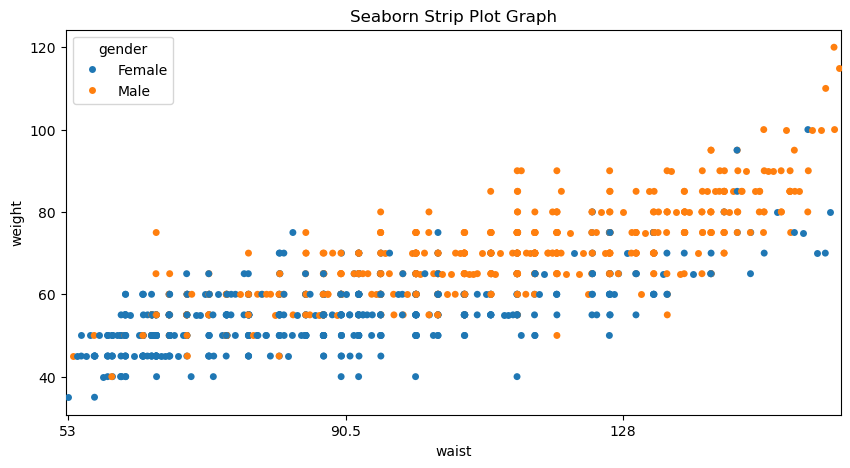

In [23]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph')

# sns.stripplot(data=male_data, x='waist', y='weight')
# sns.stripplot(data=female_data, x='waist', y='weight')
sns.stripplot(data=data6, x='waist', y='weight', hue='gender')

plt.xticks(np.arange(0,127,63), labels=[53, 90.5, 128])
plt.show()

### [시본 스트립 플롯 그래프의 팔레트 속성으로 색상 지정하기]

* 팔레트 설정값은?
  - Matplotlib Colormap에서 지정할 수 있는 값을 사용 가능
    + https://matplotlib.org/stable/users/explain/colors/colormaps.html
  - Seaborn 제공 팔레트
    + https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

#### 실습 코드 7-30. 남성과 여성의 허리둘레 및 몸무게 시본 스트립 플롯 그래프 - 색상 팔레트 지정

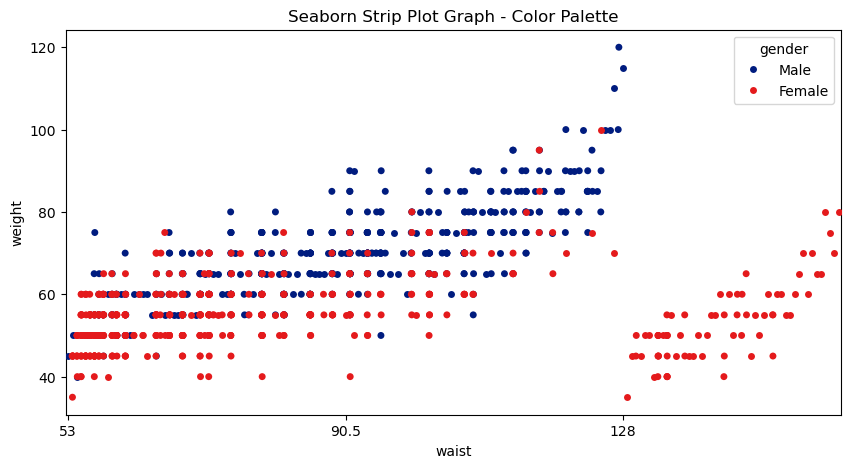

In [24]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph - Color Palette')

sns.stripplot(data=male_data, x='waist', y='weight', hue='gender', palette='dark')
sns.stripplot(data=female_data, x='waist', y='weight', hue='gender', palette='Set1')

plt.xticks(np.arange(0,127,63), labels=[53, 90.5, 128])
plt.show()

### [시본 스웜 플롯 그래프 그리기]

* **sns.swarmplot(x, y, data, hue, dodge, ax)** : 데이터의 분산까지 고려하여, 동일한 값의 데이터 포인트가 서로 중복되지 않게 표시
  - https://seaborn.pydata.org/generated/seaborn.swarmplot.html
  
#### 실습 코드 7-31. 남성 및 여성 데이터 100개 가져오기

In [25]:
male_data_100 = male_data.head(100)
female_data_100 = female_data.head(100)

#### 실습 코드 7-32. 남성과 여성의 허리둘레 및 몸무게 시본 스웜 플롯 그래프

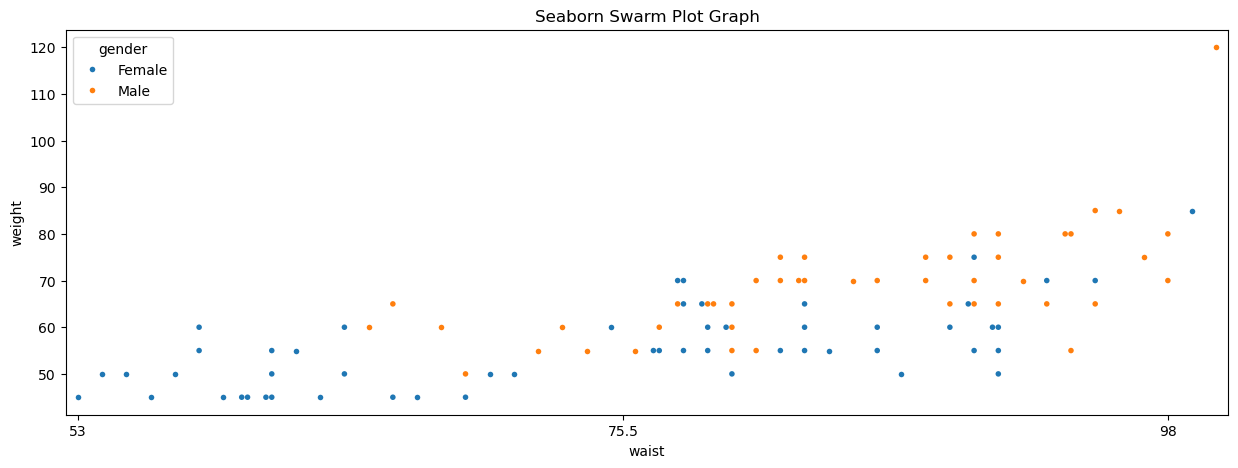

In [33]:
plt.figure(figsize=(15,5))
plt.title('Seaborn Swarm Plot Graph')

# sns.swarmplot(data=male_data_100,x='waist',y='weight',hue='gender',palette='dark',size=4)
# sns.swarmplot(data=female_data_100,x='waist',y='weight',hue='gender',palette='Set1',size=4)

# 수정코드
data6_100 = data6.head(100)
sns.swarmplot(data=data6_100, x='waist',y='weight',hue='gender', size=4)

plt.xticks(np.arange(0,46,22.5), labels=[53, 75.5, 98])
plt.show()

---
### [타이타닉 데이터셋에서 탑승객의 등급별 나이 분포를 스트립 플롯, 스웜 플롯으로 표현하기]

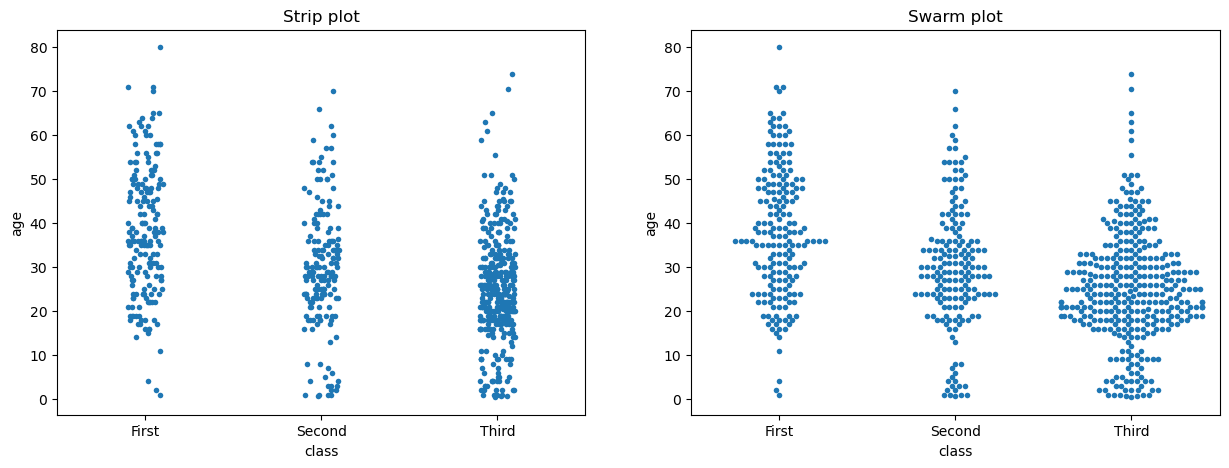

In [34]:
titanic = sns.load_dataset('titanic')

# 그래프 객체 생성
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 데이터 분산 고려하지 않은 범주형 변수의 분포 그래프
sns.stripplot(x = 'class',
              y = 'age',
              data = titanic,
              size = 4,
              ax = ax1
             )

# 데이터 분산 고려한 범주형 변수의 분포 그래프
sns.swarmplot(x = 'class',
              y = 'age',
              data = titanic,
              size = 4,
              ax = ax2
             )

ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')

plt.show()

### 3.4 시본 히스토그램 그래프

* **sns.histplot(x, data, bins, ax)** : 데이터의 빈도수를 막대 모양(히스토그램)으로 표현, 데이터 분포와 밀도 확인 가능
  - https://seaborn.pydata.org/generated/seaborn.histplot.html
* **sns.displot()** : 히스토그램 그래프를 그려주나 향후 버전에서 삭제 예정
  - https://seaborn.pydata.org/generated/seaborn.displot.html

### [시본 히스토그램 그래프 그리기]

#### 실습 코드 7-33. 남성과 여성의 몸무게 히스토그램 그래프

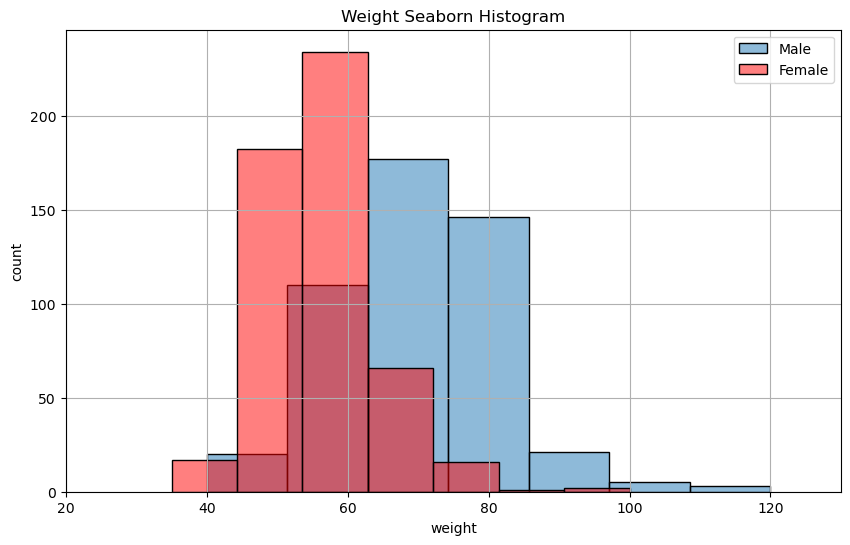

In [35]:
plt.figure(figsize=(10,6))

# 남자, 여자 각각의 몸무게 구간별 빈도수를 히스토그램 그래프로 표현
sns.histplot(male_data['weight'], bins=7, alpha=0.5, label='Male')
sns.histplot(female_data['weight'], bins=7, alpha=0.5, label='Female', color='r')

plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()

### [시본 히스토그램의 커널 밀도 추정(KDE) 속성 지정하기]

* sns.histplot(**kde = True**) 설정 : 커널 밀도 추정 그래프를 함께 표시

#### 실습 코드 7-34. 남성과 여성의 허리둘레 히스토그램 - 커널 밀도 추정(KDE) 속성 지정

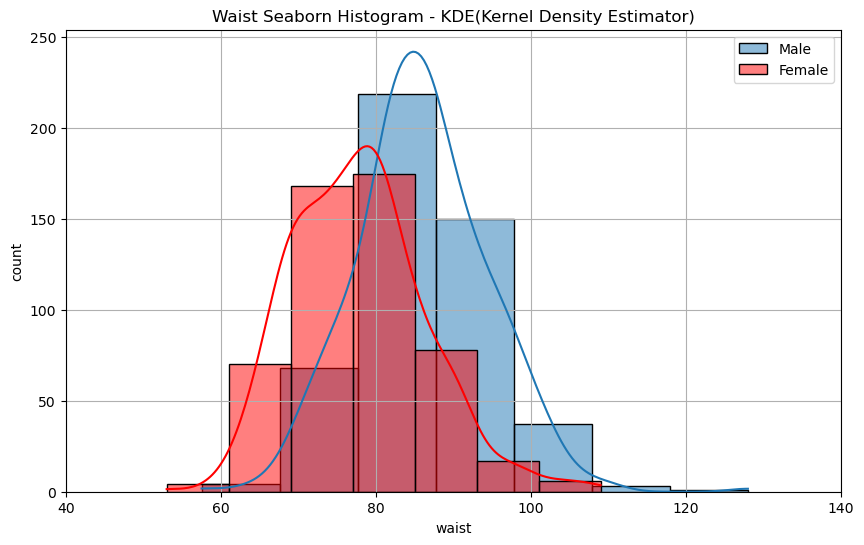

In [36]:
plt.figure(figsize=(10,6))

# kde = True 속성을 설정해서 히스토그램에 커널 밀도 추정 그래프를 함께 표시
sns.histplot(male_data['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(female_data['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

plt.xlim(40,140)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

### 3.5 시본 상자수염 그래프

* **sns.boxplot()** : 범주형 데이터 분포와 주요 통계 지표를 함께 제공 (최소값, 최대값, 1사분위(25%), 2사분위(50%, median), 3사분위(75%), outlier
  - https://seaborn.pydata.org/generated/seaborn.boxplot.html

### [시본 상자수염 그래프 그리기]

#### 실습 코드 7-35. 음주 여부와 몸무게 상자수염 그래프

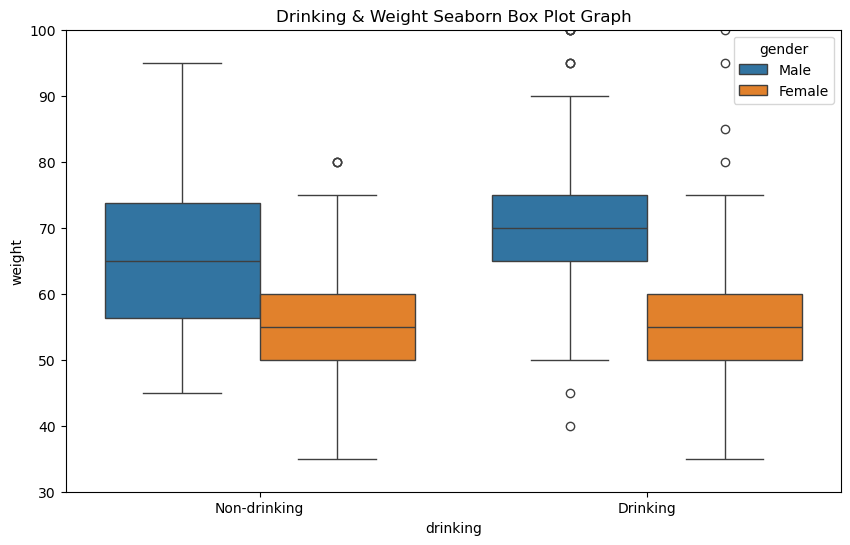

In [37]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(data=data6, x='drinking', y='weight', hue='gender')
plt.ylim(30,100)
plt.show()

### [시본 가로 상자수염 그래프 그리기]

* sns.boxplot(**orient = 'h'**) 설정 : 가로 상자수염 그래프로 전환

#### 실습 코드 7-36. 음주 여부와 허리둘레 가로 상자수염 그래프

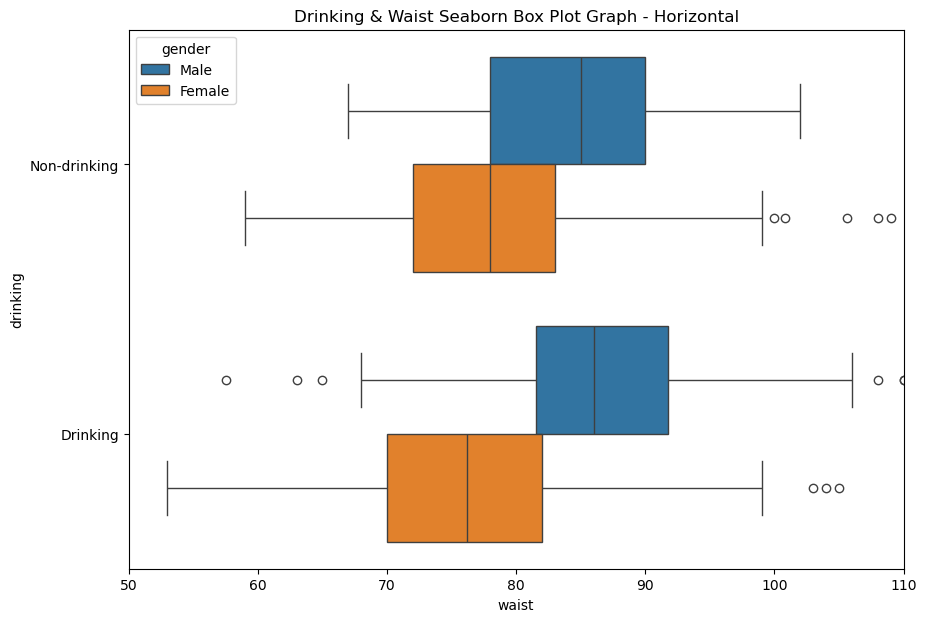

In [38]:
plt.figure(figsize=(10,7))
plt.title('Drinking & Waist Seaborn Box Plot Graph - Horizontal')

# orient = 'h' 속성을 설정해서 가로 상자수염 그래프로 표시
sns.boxplot(data=data6, x='waist', y='drinking', hue='gender', orient='h')
plt.xlim(50,110)
plt.show()

### 3.6 카운트 플롯 그래프

* **sns.countplot()** : 각 범주에 속하는 데이터의 개수를 막대 그래프로 표시
  - https://seaborn.pydata.org/generated/seaborn.countplot.html
  - 각 범주별로 데이터가 얼마나 있는지 파악
  - 해당 열을 구성하고 있는 값들을 구분하여 시각화

### [카운트 플롯 그래프 그리기]

#### 실습 코드 7-37. 성별 음주 여부 카운트 플롯 그래프

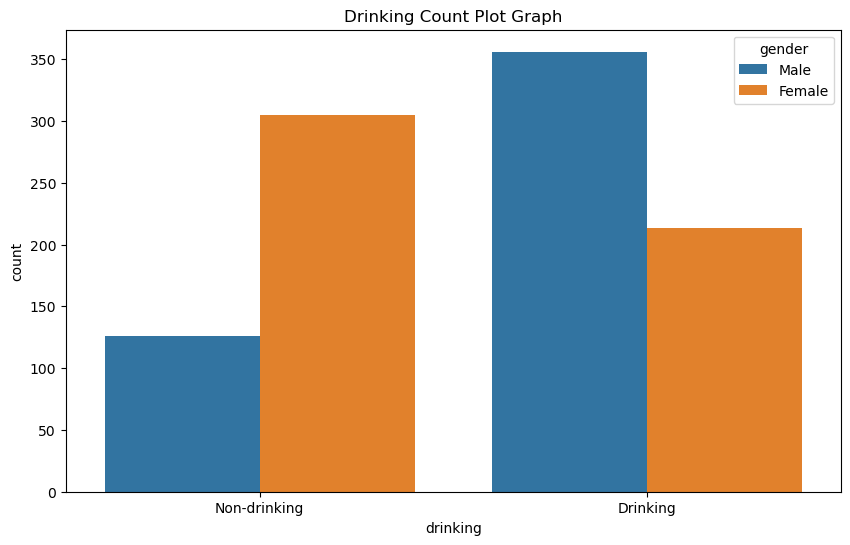

In [39]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')

# sns.countplot() 함수를 이용하여 음주 여부에 대해서 남,여 각각 몇 명씩 있는지 표시
sns.countplot(data=data6, x='drinking', hue='gender')

plt.show()

### [가로 카운트 플롯 그래프 그리기]

* sns.countplot(**y = '범주데이터'**) 설정 : x축 대신 y축을 주축으로 막대 그래프 표시

#### 실습 코드 7-38. 성별 흡연상태 가로 카운트 플롯 그래프

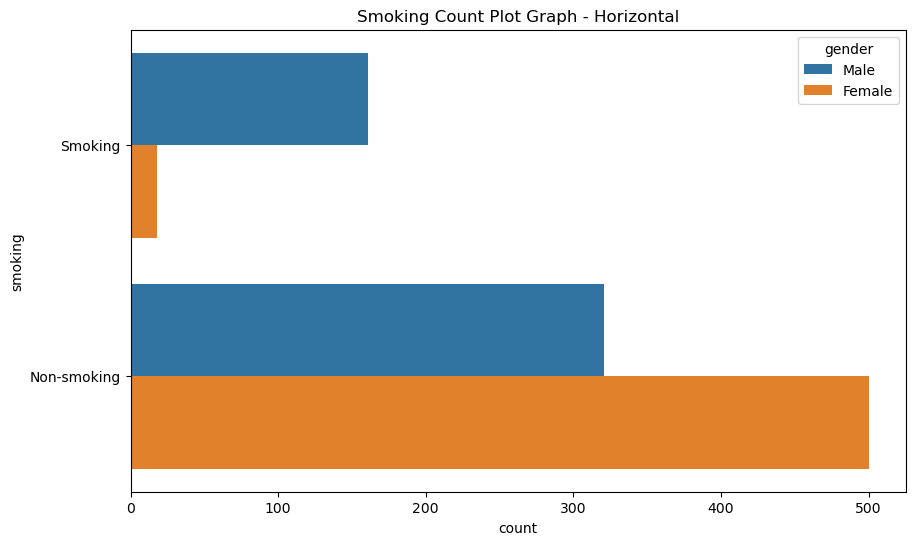

In [40]:
plt.figure(figsize=(10,6))
plt.title('Smoking Count Plot Graph - Horizontal')
sns.countplot(data=data6, y='smoking', hue='gender', order=['Smoking','Non-smoking'])
plt.show()

### 3.7 바이올린 플롯 그래프

* **sns.violinplot()** : 박스 플롯에 커널 밀도 추정 함수 그래프를 y 축 방향으로 추가
  - https://seaborn.pydata.org/generated/seaborn.violinplot.html

### [바이올린 플롯 그래프 그리기]

#### 실습 코드 7-39. 성별 몸무게를 음주 여부로 분리하여 그린 바이올린 플롯 그래프

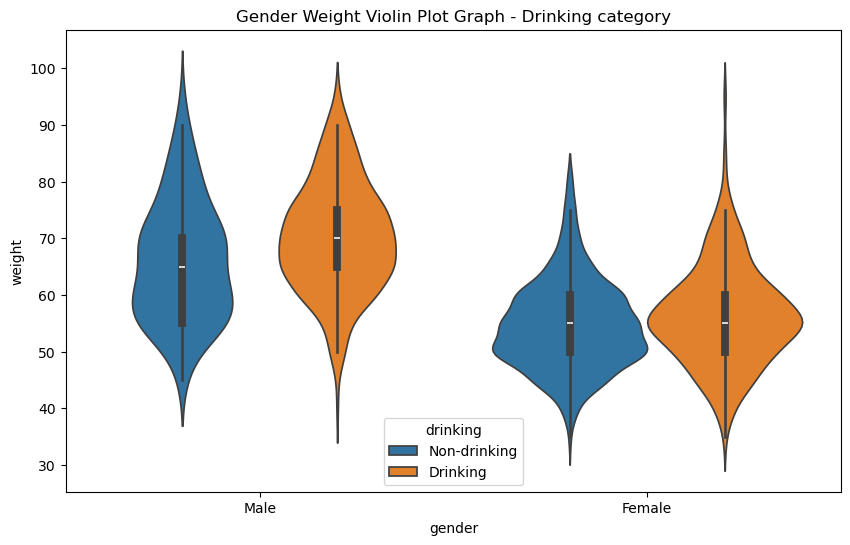

In [41]:
plt.figure(figsize=(10,6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')
sns.violinplot(data=data6[data6.weight<100], x='gender', y='weight', hue='drinking')
plt.show()

### [가로 바이올린 플롯 그래프 그리기]

* sns.violinplot(**y = '범주데이터'**) 설정 : x축 대신 y축을 주축으로 바이올린 플롯 그래프 표시

#### 실습 코드 7-40. 성별 허리둘레를 음주 여부로 분리하여 그린 가로 바이올린 플롯 그래프

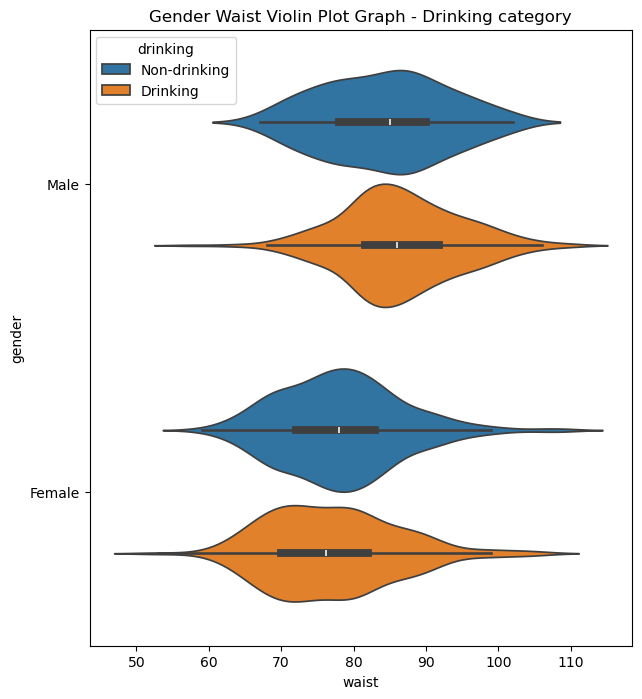

In [42]:
plt.figure(figsize=(7,8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')
sns.violinplot(data=data6[data6.waist<120], y='gender', x='waist', hue='drinking')
plt.show()

### 3.8 시본 히트맵 그래프

* **sns.heatmap()**
   - 2개의 범주형 변수를 x, y축에 놓고 데이터를 매트릭스 형태로 분류
   - 색상으로 표현된 행렬 정보를 이용하여 사각형의 그래프를 표시
   - 2개의 카테고리 값에 대한 값 변화를 한눈에 파악 가능
   - https://seaborn.pydata.org/generated/seaborn.heatmap.html

### [데이터 준비하기]

#### 실습 코드 7-41. 히트맵에 사용할 데이터 준비

In [43]:
data3 = data.loc[:,['gender','weight','waist']]
data8 = data.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

In [44]:
data3.head()

,gender,weight,waist
0,1,60,72.1
1,2,65,81.0
2,2,55,70.0
3,1,70,90.8
4,2,50,75.2


In [45]:
data8.head()

,gender,weight,waist,drinking,smoking,cholesterol,HDL,LDL
0,1,60,72.1,0,1,188.0,58.0,118.0
1,2,65,81.0,0,1,NaN,NaN,NaN
2,2,55,70.0,0,1,NaN,NaN,NaN
3,1,70,90.8,0,1,NaN,NaN,NaN
4,2,50,75.2,0,1,220.0,53.0,133.0


### [3x3 히트맵 그래프 그리기]

#### 실습 코드 7-42. 3x3 히트맵 그래프

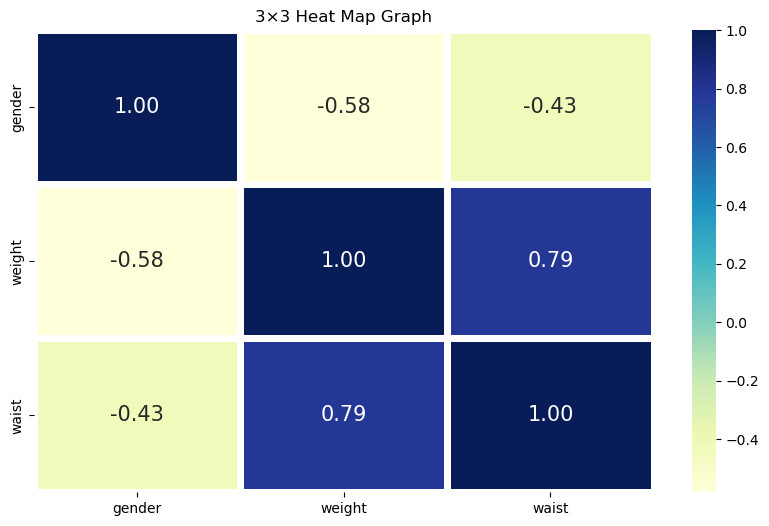

In [46]:
plt.figure(figsize=(10,6))
plt.title('3×3 Heat Map Graph')

# 데이터프레임의 corr() 함수를 이용하여 데이터프레임 각 열간의 상관관계를 계산
# 상관관계 계산 결과를 correlation_data3 변수에 저장 (데이터프레임)
correlation_data3 = data3.corr()

# 상관관계 정보를 히트맵으로 표현
sns.heatmap(correlation_data3,              # 히트맵에 출력하기 위한 데이터
            fmt = '.2f',                    # 각 타일에 출력될 데이터 값의 포맷
            annot = True,                   # 데이터 값의 주석 표시 여부
            annot_kws = {'size' : 15},      # 주석의 서식 지정
            cmap='YlGnBu',                  # 컬러맵 설정
            linewidth = 5,                  # 구분선 두께
            cbar = True                     # 컬러바 표시 여부
           )


plt.show()

### [8x8 히트맵 그래프 그리기]

* **np.triu(data, k = 0)** : 상삼각행렬 계산
  - 히트맵 그래프에서 1로 표시된 대각선을 중심으로 오른쪽 상단의 삼각형 영역을 보이지 않도록 하기 위해 사용
  - https://numpy.org/doc/stable/reference/generated/numpy.triu.html
* **np.tril(data, k = 0)** : 하삼각행렬 계산
  - 히트맵 그래프에서 1로 표시된 대각선을 중심으로 왼쪽 하단의 삼각형 영역을 보이지 않도록 하기 위해 사용
  - https://numpy.org/doc/stable/reference/generated/numpy.tril.html
* sns.heatmap(**mask = ndarray**) : 히트맵의 타일 중 출력하지 않을 타일에 대한 mask 설정
  - mask로 입력되는 ndarray의 행/열 값이 True인 경우 값이 히트맵의 해당 타일이 보이지 않도록 설정

#### 실습 코드 7-43. 8x8 히트맵 그래프

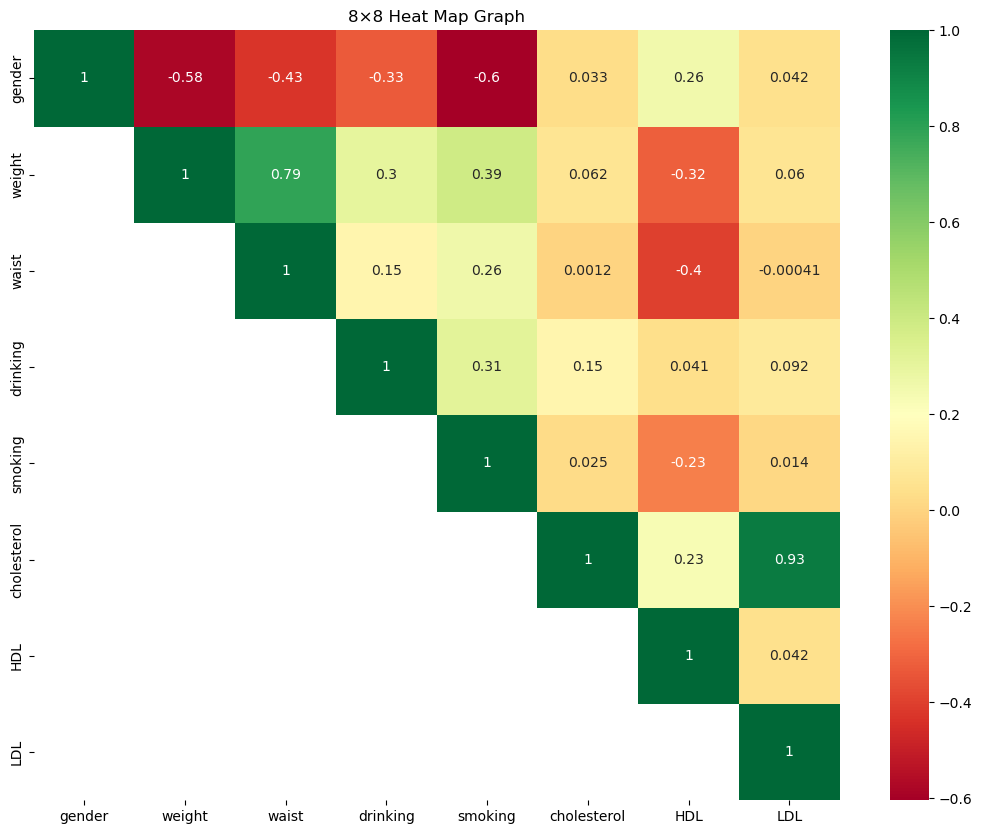

In [52]:
plt.figure(figsize=(13,10))
plt.title('8×8 Heat Map Graph')

correlation_data8= data8.corr()
upp_mat = np.tril(correlation_data8, k = -1)

sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

### 3.9 다중 플롯 그리드 그래프

* 다양한 범주의 값을 가지는 데이터에 대하여 다양한 형태의 그래프를 다차원 그리드로 시각화
* 패싯 그리드(Facet Grid), 페어 플롯(Pair Plot), 조인 플롯(Join Plot) 그래프 등

### [패싯 그리드 그래프]

* **sns.FacetGrid(data, row, col, height, aspect)** : 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 생성한 후 각 서브 플롯에 적용할 그래프 종류를 **map()** 함수를 이용하여 그리드 객체에 전달
  - https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

#### (열 기준으로 나눈 패싯 그리드 그래프 그리기)

#### 실습 코드 7-44. 열 기준으로 나눈 패싯 그리드 그래프

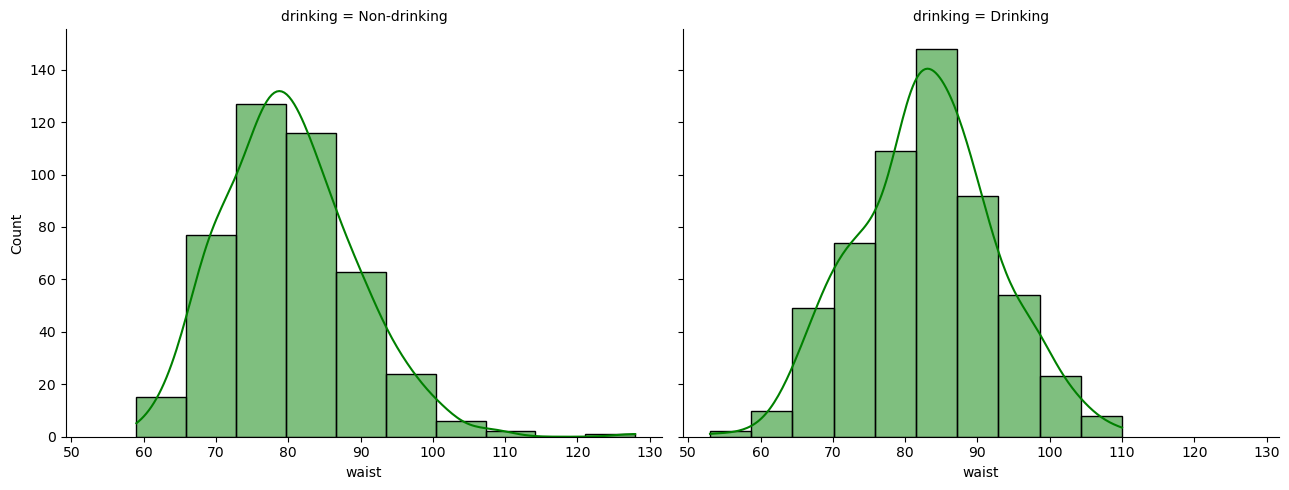

In [53]:
# data6 데이터프레임에 대해서 FacetGrid 생성
#  - col = 'drinking' : 음주 여부(drinking) 데이터(Non-drinking, Drinking)를 열 기준으로 나눔
#  - height = 5 : 그래프의 높이를 5인치로 설정 (기본 3인치)
#  - aspect = 1.3 : 세로 대비 가로 비율 1.3 (기본 1:1)
fg = sns.FacetGrid(data6, col='drinking', height=5, aspect=1.3)

# 서브 플롯에 그릴 히스토그램 histplot() 함수를 지정
#  - x축 데이터로 허리둘레(waist) 지정
#  - 히스토그램 구간(계급) 개수 10개 지정
#  - 그래프 색상은 green 지정
#  - 히스토그램 막대 그래프와 KDE(커널 밀도 추정) 그래프를 함께 그림
fg.map(sns.histplot, 'waist', bins=10, color='g', kde=True)

plt.show()

#### (행과 열 기준으로 나눈 패싯 그리드 그래프 그리기)

#### 실습 코드 7-45. 행과 열 기준으로 나눈 패싯 그리드 그래프

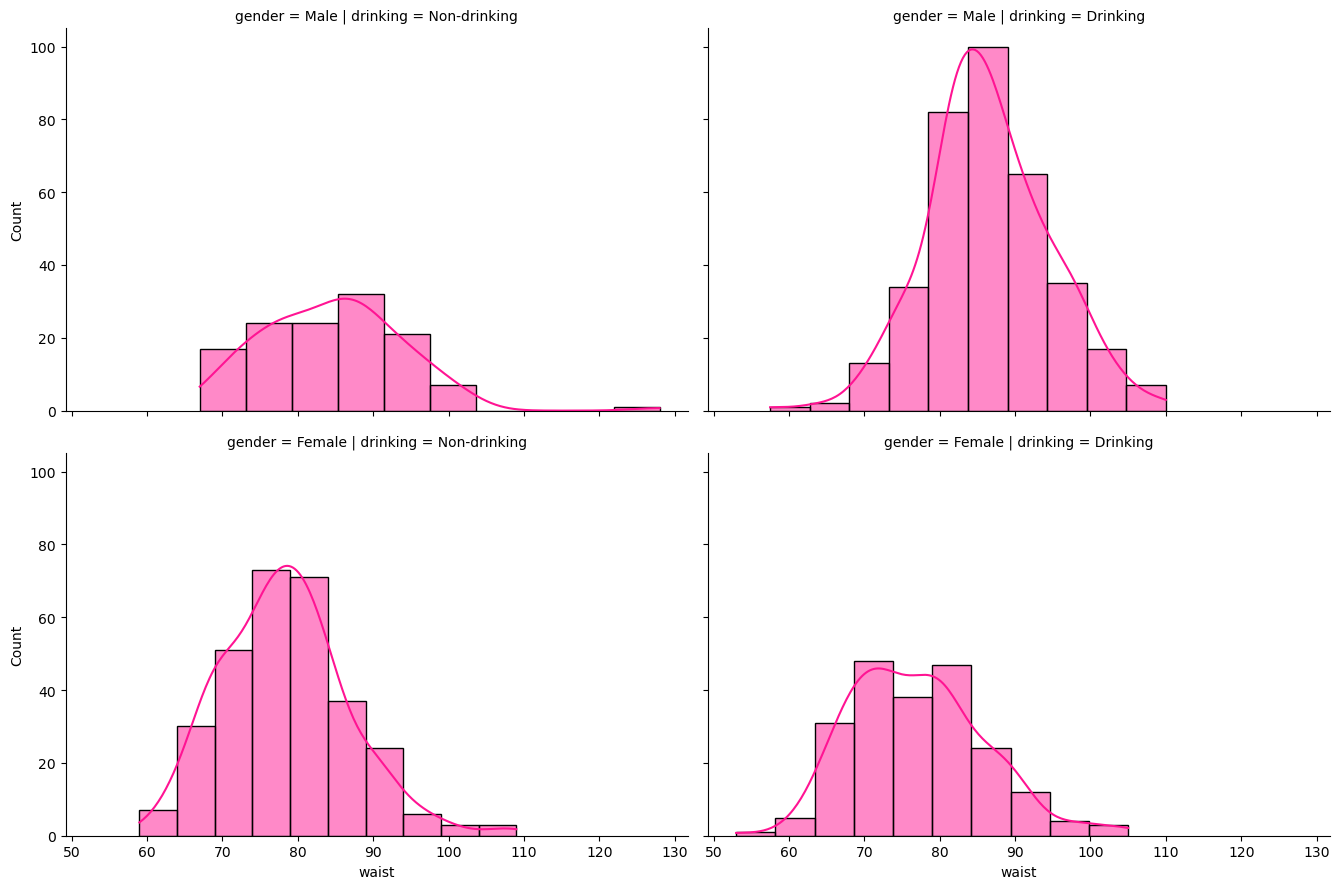

In [54]:
# data6 데이터프레임에 대해서 FacetGrid 생성
#  - row = 'gender' : 성별(gender) 데이터(Male, Female)를 행 기준으로 나눔
#  - col = 'drinking' : 음주 여부(drinking) 데이터(Non-drinking, Drinking)를 열 기준으로 나눔
#  - height = 4.5 : 그래프의 높이를 4.5인치로 설정 (기본 3인치)
#  - aspect = 1.5 : 세로 대비 가로 비율 1.5 (기본 1:1)
fg = sns.FacetGrid(data6, row='gender', col='drinking', height=4.5, aspect=1.5)

# 서브 플롯에 그릴 히스토그램 histplot() 함수를 지정
#  - x축 데이터로 허리둘레(waist) 지정
#  - 히스토그램 구간(계급) 개수 10개 지정
#  - 그래프 색상은 deeppink 지정
#  - 히스토그램 막대 그래프와 KDE(커널 밀도 추정) 그래프를 함께 그림
fg.map(sns.histplot, 'waist', bins=10, color='deeppink', kde=True)

plt.show()

### [페어 플롯 그래프]

* 3차원 이상의 다차원 실수형 데이터를 시각화
* 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 그래프 표현
  - 같은 열끼리는 히스토그램 그래프 출력
  - 다른 열끼리는 산점도 그래프 출력
* 그래프에 적용할 수 있는 열은 숫자형 데이터만 가능

#### (pairplot() 함수로 페어 플롯 그래프 그리기)

* **pairplot(data, hue, ...)**
  - https://seaborn.pydata.org/generated/seaborn.pairplot.html

#### 실습 코드 7-46. 페어 플롯 그래프
* 숫자형 데이터만 그래프로 보여주기 때문에 전처리 과정에서 문자열로 변경한 **성별(gender), 음주 여부(drinking), 흡연 상태(smoking) 열 데이터는 표시되지 않음**

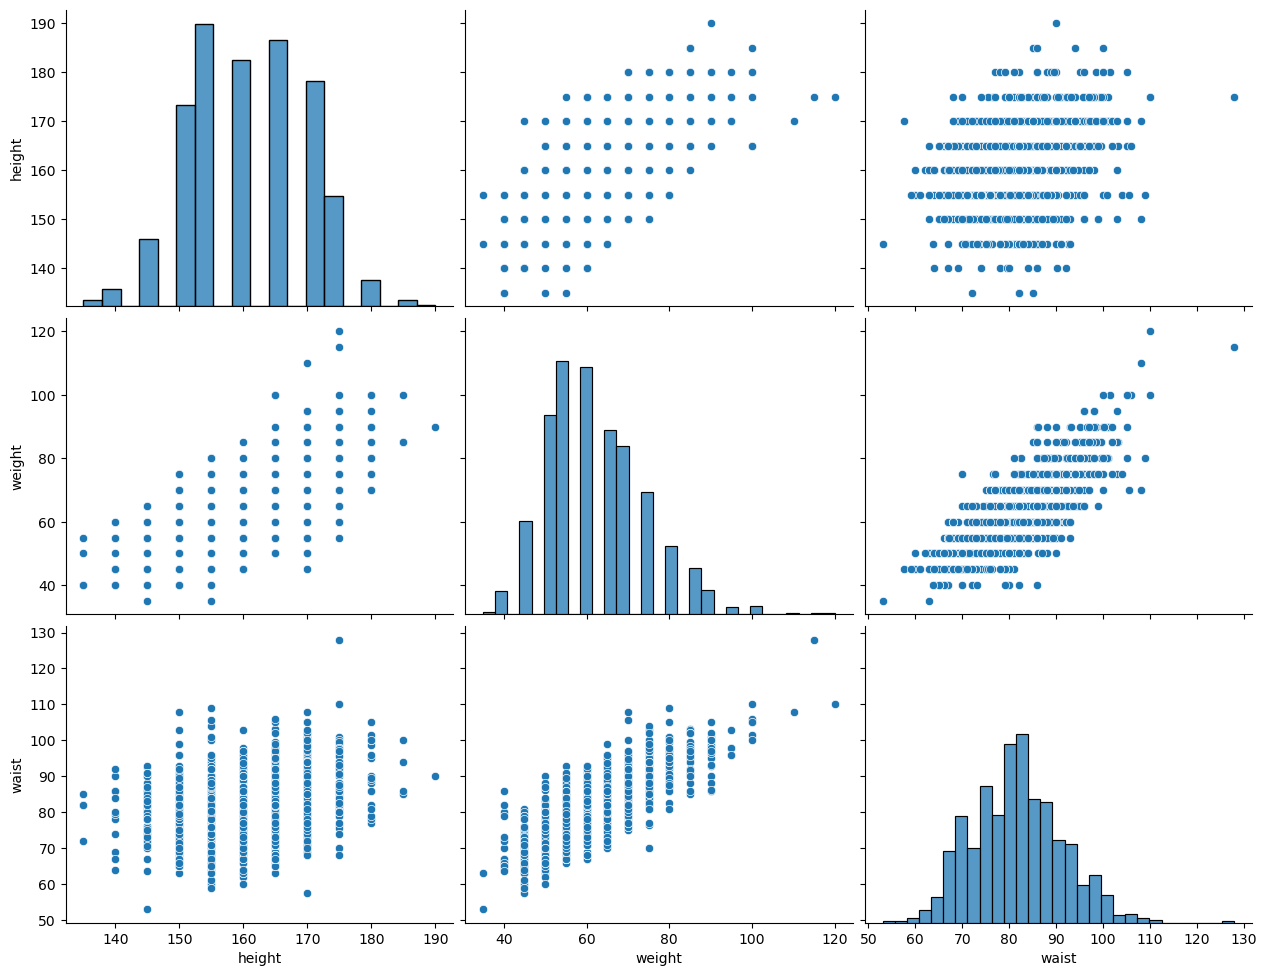

In [55]:
sns.pairplot(data6, height=3.3, aspect=1.3)
plt.show()

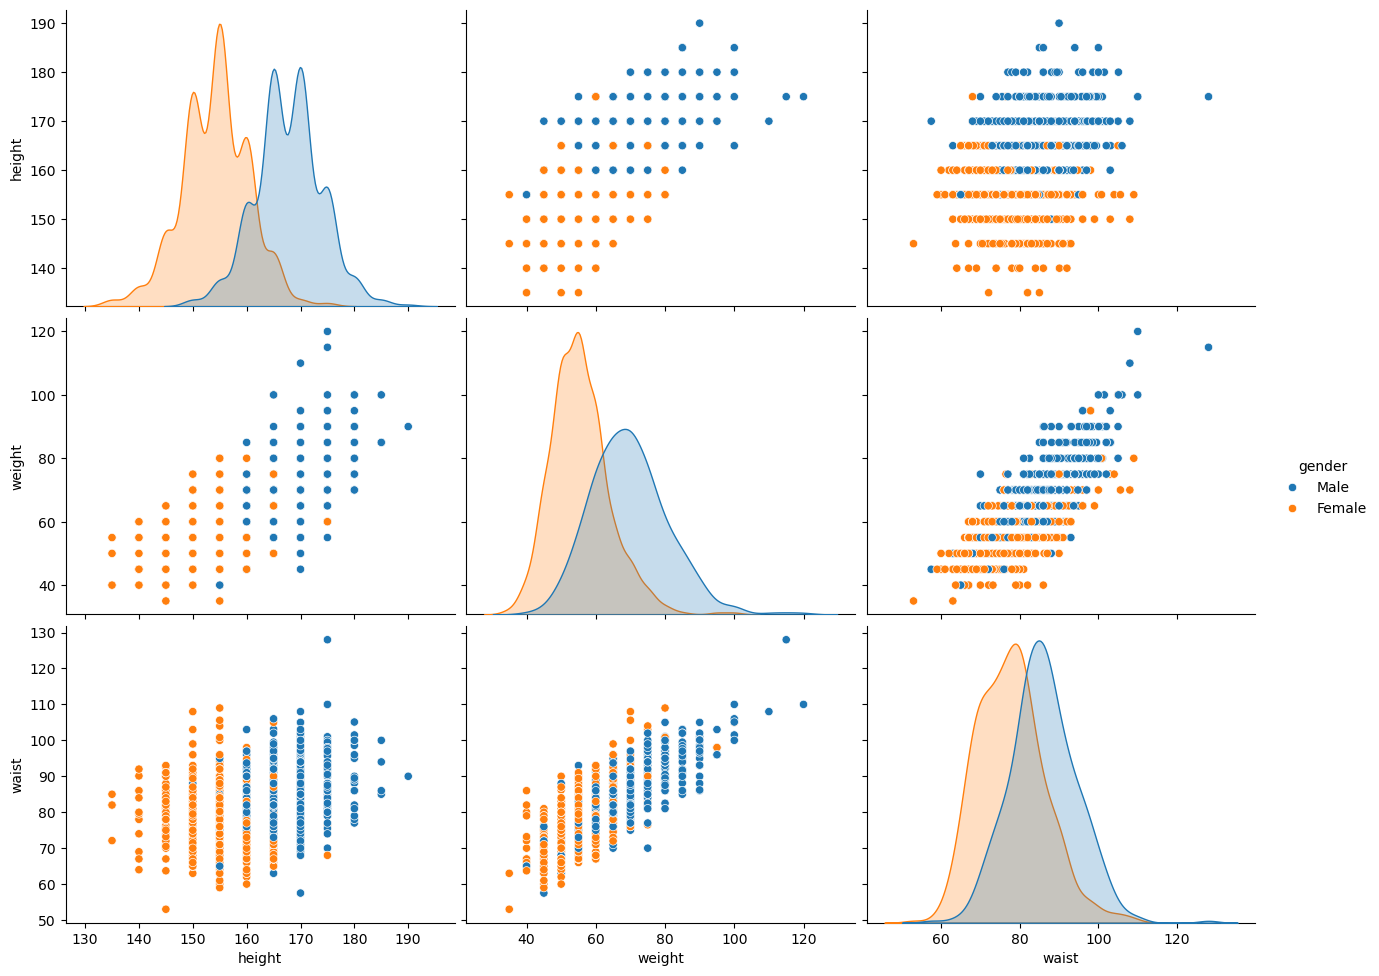

In [56]:
# hue 속성을 'gender'로 지정하여 성별 그래프를 분리하여 표시
sns.pairplot(data6, hue='gender', height=3.3, aspect=1.3)
plt.show()

#### (PairGrid() 함수로 페어 플롯 그래프 그리기)

* **sns.PairGrid()** : sns.pairplot() 보다 다양한 기능이나 세부적인 설정을 적용
  - https://seaborn.pydata.org/generated/seaborn.PairGrid.html

#### 실습 코드 7-47. PairGrid() 함수로 그린 페어 플롯 그래프

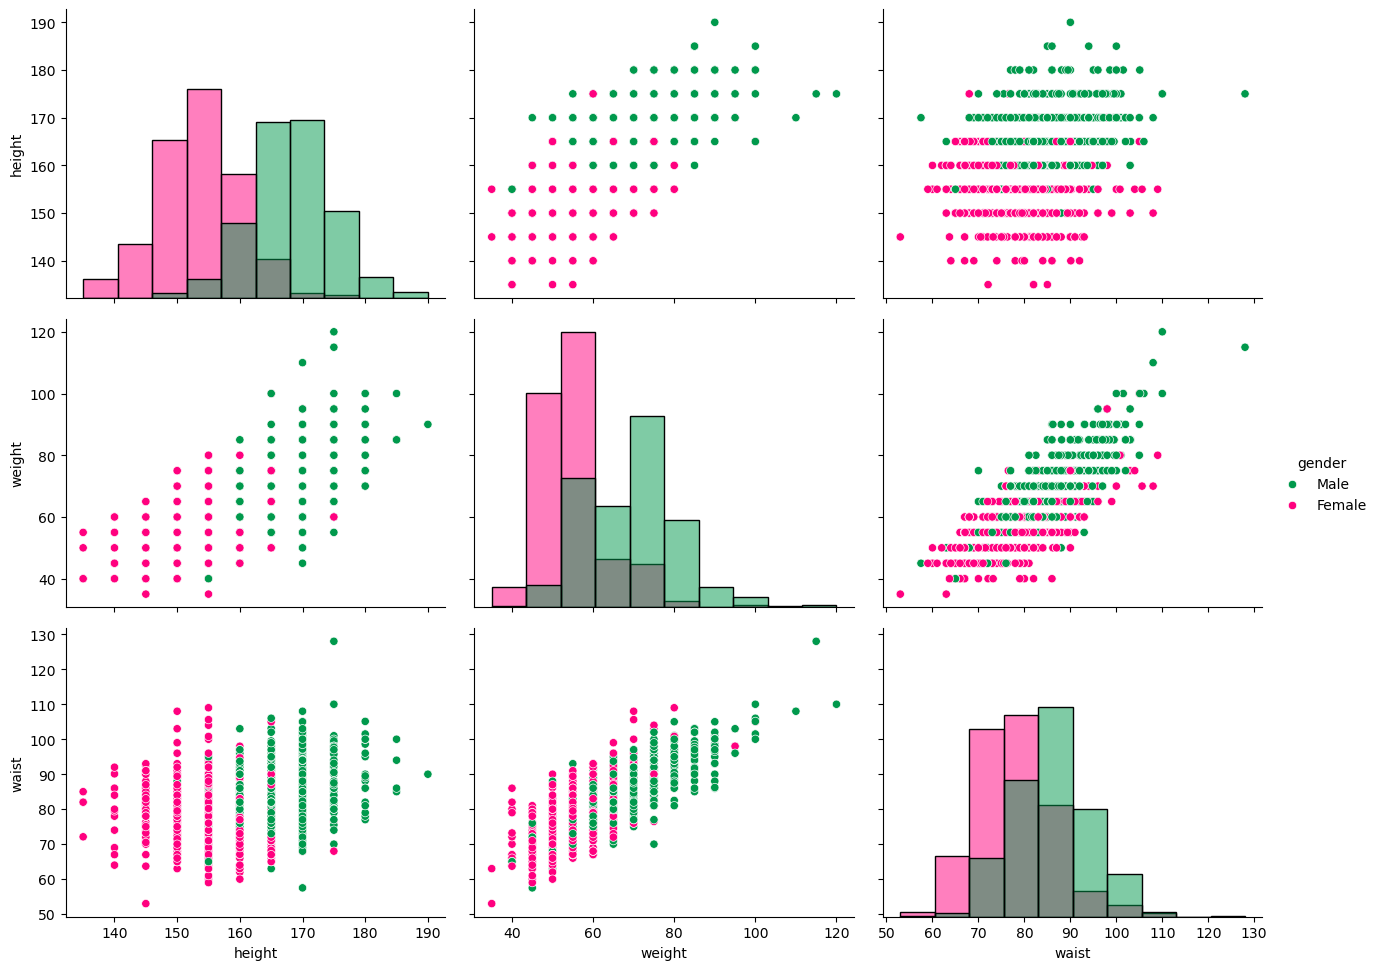

In [57]:
# 페어 플롯 그래프에 적용할 색상을 color 변수에 저장
color = ['#00994C', '#FF007F']

# data6 데이터에 대해서 페어 플롯 그래프 생성
#  - hue = 'gender' : 성별로 그래프를 분리하여 표시
#  - palette = color : color 변수에 지정된 색상 코드 적용
#  - height = 3.3 : 그래프의 높이 3.3 인치
#  - aspect = 1.3 : 세로 대비 가로 비율 1.3
pp = sns.PairGrid(data6, hue='gender', palette=color, height=3.3, aspect=1.3)

# 페어 플롯 그래프 중 대각선 방향에 있는 영역에 그릴 히스토그램 그래프 지정
pp.map_diag(sns.histplot, bins=10)
# 페어 플롯 그래프 중 대각선 방향 이외에 있는 영역에 그릴 산점도 그래프 지정
pp.map_offdiag(sns.scatterplot)
# 페어 플롯 그래프에 범례를 추가
pp.add_legend()

plt.show()